In [16]:
import pandas as pd
from datetime import datetime

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
# import time

import os

In [17]:
tickers = ['FTSEMIB.MI', # FTSE MIB
              '^FTSE',    # FTSE 100
              '^GDAXI',   # DAX
              '^N225',  # Nikkei 225
              '^FCHI',  # CAC 40
              '^IBEX',  # IBEX 35
             ]

In [18]:
# start_date = "2010-01-01"
# end_date = datetime.now().strftime("%Y-%m-%d")

# # Download historical data from yf API
# data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# # download data to csv
# # download path
# download_path = os.path.abspath(os.path.join("..", "10_151+1 trading strategies", "00_data"))

# # file name is data_tickers_startdate_enddate.csv
# data.to_csv(f"{download_path}/data_{tickers}_{start_date}_{end_date}.csv")

In [19]:
# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "10_151+1 trading strategies", "00_data", "data_['FTSEMIB.MI', '^FTSE', '^GDAXI', '^N225', '^FCHI', '^IBEX']_2010-01-01_2025-10-28.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "S&P500_D_1789-05-01_2025-10-10.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "S&P500_D_1789-05-01_2025-10-10.csv"

print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path, header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# fill forward missing values
df = df.fillna(method='ffill')

# Convert all values to float
df = df.astype(float)

# rename tickers in df level 0 to more readable names with replace function
df.columns = df.columns.set_levels(
    df.columns.levels[0].str.replace('^FTSE', 'FTSE100')
                      .str.replace('^GDAXI', 'DAX40')
                      .str.replace('^N225', 'Nikkei225')
                      .str.replace('^FCHI', 'CAC40')
                      .str.replace('^IBEX', 'IBEX35')
                      .str.replace('FTSEMIB.MI', 'ITA40'),
    level=0
)


# Show the first few rows of the dataframe
df.head()


Path exists: True


Ticker            DAX40                                                      \
Price              Open         High          Low        Close       Volume   
Date                                                                          
2010-01-04  5975.520020  6048.299805  5974.430176  6048.299805  104344400.0   
2010-01-05  6043.939941  6058.020020  6015.669922  6031.859863  117572100.0   
2010-01-06  6032.390137  6047.569824  5997.089844  6034.330078  108742400.0   
2010-01-07  6016.799805  6037.569824  5961.250000  6019.359863  133704300.0   
2010-01-08  6028.620117  6053.040039  5972.240234  6037.609863  126099000.0   

Ticker            CAC40                                                      \
Price              Open         High          Low        Close       Volume   
Date                                                                          
2010-01-04  3952.209961  4013.969971  3950.610107  4013.969971  113396000.0   
2010-01-05  4012.429932  4028.340088  3993.330078  4012.909912  129518600.0   
2010-01-06  4014.449951  4022.939941  3996.800049  4017.669922  110087000.0   
2010-01-07  4005.959961  4032.239990  3983.899902  4024.800049  118430400.0   
2010-01-08  4042.639893  4051.409912  4013.340088  4045.139893  131783200.0   

Ticker      ...        IBEX35                                            \
Price       ...          Open          High           Low         Close   
Date        ...                                                           
2010-01-04  ...  11986.487470  12145.086914  11986.087080  12145.086914   
2010-01-05  ...  12141.787174  12240.487267  12139.787177  12204.387695   
2010-01-06  ...  12216.387702  12230.687491  12147.586992  12222.487305   
2010-01-07  ...  12162.987308  12199.687465  12079.087005  12166.287109   
2010-01-08  ...  12217.987247  12232.187428  12079.887782  12162.987305   

Ticker                    FTSE100                                         \
Price         Volume         Open         High          Low        Close   
Date                                                                       
2010-01-04  184200.0  5412.899902  5500.299805  5410.799805  5500.299805   
2010-01-05  238400.0  5500.299805  5536.399902  5480.700195  5522.500000   
2010-01-06  123800.0  5522.500000  5536.500000  5497.700195  5530.000000   
2010-01-07  192400.0  5530.000000  5551.700195  5499.799805  5526.700195   
2010-01-08  213200.0  5526.700195  5549.299805  5494.799805  5534.200195   

Ticker                    
Price             Volume  
Date                      
2010-01-04  7.509420e+08  
2010-01-05  1.149301e+09  
2010-01-06  9.982953e+08  
2010-01-07  1.162934e+09  
2010-01-08  1.006421e+09  

[5 rows x 30 columns]

In [20]:
# count of missing values per column
df.isnull().sum()

Ticker     Price 
DAX40      Open      0
           High      0
           Low       0
           Close     0
           Volume    0
CAC40      Open      0
           High      0
           Low       0
           Close     0
           Volume    0
ITA40      Open      0
           High      0
           Low       0
           Close     0
           Volume    0
Nikkei225  Open      0
           High      0
           Low       0
           Close     0
           Volume    0
IBEX35     Open      0
           High      0
           Low       0
           Close     0
           Volume    0
FTSE100    Open      0
           High      0
           Low       0
           Close     0
           Volume    0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4116 entries, 2010-01-04 to 2025-10-27
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (DAX40, Open)        4116 non-null   float64
 1   (DAX40, High)        4116 non-null   float64
 2   (DAX40, Low)         4116 non-null   float64
 3   (DAX40, Close)       4116 non-null   float64
 4   (DAX40, Volume)      4116 non-null   float64
 5   (CAC40, Open)        4116 non-null   float64
 6   (CAC40, High)        4116 non-null   float64
 7   (CAC40, Low)         4116 non-null   float64
 8   (CAC40, Close)       4116 non-null   float64
 9   (CAC40, Volume)      4116 non-null   float64
 10  (ITA40, Open)        4116 non-null   float64
 11  (ITA40, High)        4116 non-null   float64
 12  (ITA40, Low)         4116 non-null   float64
 13  (ITA40, Close)       4116 non-null   float64
 14  (ITA40, Volume)      4116 non-null   float64
 15  (Nikkei225, Open)    4116 no

In [22]:
df.shape

(4116, 30)

In [23]:
# # plot close prices over time
# plt.figure(figsize=(14, 7))
# plt.plot(df.index, df['close'], label='Close Price')
# plt.title('S&P 500 Close Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.grid()
# plt.show()

In [24]:
df.head()

Ticker            DAX40                                                      \
Price              Open         High          Low        Close       Volume   
Date                                                                          
2010-01-04  5975.520020  6048.299805  5974.430176  6048.299805  104344400.0   
2010-01-05  6043.939941  6058.020020  6015.669922  6031.859863  117572100.0   
2010-01-06  6032.390137  6047.569824  5997.089844  6034.330078  108742400.0   
2010-01-07  6016.799805  6037.569824  5961.250000  6019.359863  133704300.0   
2010-01-08  6028.620117  6053.040039  5972.240234  6037.609863  126099000.0   

Ticker            CAC40                                                      \
Price              Open         High          Low        Close       Volume   
Date                                                                          
2010-01-04  3952.209961  4013.969971  3950.610107  4013.969971  113396000.0   
2010-01-05  4012.429932  4028.340088  3993.330078  4012.909912  129518600.0   
2010-01-06  4014.449951  4022.939941  3996.800049  4017.669922  110087000.0   
2010-01-07  4005.959961  4032.239990  3983.899902  4024.800049  118430400.0   
2010-01-08  4042.639893  4051.409912  4013.340088  4045.139893  131783200.0   

Ticker      ...        IBEX35                                            \
Price       ...          Open          High           Low         Close   
Date        ...                                                           
2010-01-04  ...  11986.487470  12145.086914  11986.087080  12145.086914   
2010-01-05  ...  12141.787174  12240.487267  12139.787177  12204.387695   
2010-01-06  ...  12216.387702  12230.687491  12147.586992  12222.487305   
2010-01-07  ...  12162.987308  12199.687465  12079.087005  12166.287109   
2010-01-08  ...  12217.987247  12232.187428  12079.887782  12162.987305   

Ticker                    FTSE100                                         \
Price         Volume         Open         High          Low        Close   
Date                                                                       
2010-01-04  184200.0  5412.899902  5500.299805  5410.799805  5500.299805   
2010-01-05  238400.0  5500.299805  5536.399902  5480.700195  5522.500000   
2010-01-06  123800.0  5522.500000  5536.500000  5497.700195  5530.000000   
2010-01-07  192400.0  5530.000000  5551.700195  5499.799805  5526.700195   
2010-01-08  213200.0  5526.700195  5549.299805  5494.799805  5534.200195   

Ticker                    
Price             Volume  
Date                      
2010-01-04  7.509420e+08  
2010-01-05  1.149301e+09  
2010-01-06  9.982953e+08  
2010-01-07  1.162934e+09  
2010-01-08  1.006421e+09  

[5 rows x 30 columns]

In [25]:
# level 0 tickers = df.columns.levels[0].tolist()
level_0_tickers = df.columns.levels[0].tolist()
level_0_tickers

['ITA40', 'CAC40', 'FTSE100', 'DAX40', 'IBEX35', 'Nikkei225']

In [26]:
"""
Simple Trading Strategy based on Overnight Returns

Entry Condition:
Close Price of the current day

Exit Condition:
Open Price of the next day (next_day_open)

Assumptions:
Entry at Close Price and Exit at Open Price the next day is not realistic due to market hours.
We assume we can trade at these prices for the sake of this strategy.
In a real-world scenario, we would need to consider market hours to enter and exit trades few seconds
before market close and few seconds after market open.
""";

In [27]:
def calculate_overnight_returns(df, tickers):
    """
    Calculate overnight returns for each ticker in the dataframe.
    
    Parameters:
    df: DataFrame with MultiIndex columns (ticker, OHLCV)
    tickers: List of ticker symbols (level 0 of MultiIndex)
    
    Returns:
    DataFrame with additional next_day_open and overnight_return columns for each ticker
    """
    df_new = df.copy()
    
    for ticker in tickers:
        try:
            # Check if the ticker exists in the dataframe
            if ticker not in df.columns.levels[0]:
                print(f"Warning: Ticker '{ticker}' not found in dataframe")
                continue
                
            # Calculate next day open (shift open price by -1 day)
            df_new[(ticker, 'next_day_open')] = df_new[(ticker, 'Open')].shift(-1)
            
            # Calculate overnight return: (next_day_open - close) / close
            df_new[(ticker, 'overnight_return')] = (
                (df_new[(ticker, 'next_day_open')] - df_new[(ticker, 'Close')]) / 
                df_new[(ticker, 'Close')]
            )
            # calculate cumulative returns
            df_new[(ticker, 'overnight_cumulative_return')] = (1 + df_new[(ticker, 'overnight_return')]).cumprod() - 1
            
            print(f"Processed ticker: {ticker}")
            
        except KeyError as e:
            print(f"Error processing ticker '{ticker}': {e}")
        except Exception as e:
            print(f"Unexpected error for ticker '{ticker}': {e}")
    
    return df_new

# Apply the function to create a new dataframe
df_with_overnight = calculate_overnight_returns(df, level_0_tickers)

# Display the shape and first few rows to verify
print(f"\nOriginal dataframe shape: {df.shape}")
print(f"New dataframe shape: {df_with_overnight.shape}")
print(f"\nFirst few rows of new columns for first ticker ({level_0_tickers[0]}):")
print(df_with_overnight[[
    (level_0_tickers[0], 'Close'),
    (level_0_tickers[0], 'next_day_open'),
    (level_0_tickers[0], 'overnight_return')
]].head(10))

Processed ticker: ITA40
Processed ticker: CAC40
Processed ticker: FTSE100
Processed ticker: DAX40
Processed ticker: IBEX35
Processed ticker: Nikkei225

Original dataframe shape: (4116, 30)
New dataframe shape: (4116, 48)

First few rows of new columns for first ticker (ITA40):
Ticker        ITA40                               
Price         Close next_day_open overnight_return
Date                                              
2010-01-04  23545.0       23554.0         0.000382
2010-01-05  23556.0       23580.0         0.001019
2010-01-06  23622.0       23551.0        -0.003006
2010-01-07  23709.0       23816.0         0.004513
2010-01-08  23811.0       23946.0         0.005670
2010-01-11  23775.0       23823.0         0.002019
2010-01-12  23583.0       23486.0        -0.004113
2010-01-13  23658.0       23831.0         0.007313
2010-01-14  23806.0       23894.0         0.003697
2010-01-15  23472.0       23554.0         0.003494


In [28]:
df_with_overnight.head()

Ticker            DAX40                                                      \
Price              Open         High          Low        Close       Volume   
Date                                                                          
2010-01-04  5975.520020  6048.299805  5974.430176  6048.299805  104344400.0   
2010-01-05  6043.939941  6058.020020  6015.669922  6031.859863  117572100.0   
2010-01-06  6032.390137  6047.569824  5997.089844  6034.330078  108742400.0   
2010-01-07  6016.799805  6037.569824  5961.250000  6019.359863  133704300.0   
2010-01-08  6028.620117  6053.040039  5972.240234  6037.609863  126099000.0   

Ticker            CAC40                                                      \
Price              Open         High          Low        Close       Volume   
Date                                                                          
2010-01-04  3952.209961  4013.969971  3950.610107  4013.969971  113396000.0   
2010-01-05  4012.429932  4028.340088  3993.330078  4012.909912  129518600.0   
2010-01-06  4014.449951  4022.939941  3996.800049  4017.669922  110087000.0   
2010-01-07  4005.959961  4032.239990  3983.899902  4024.800049  118430400.0   
2010-01-08  4042.639893  4051.409912  4013.340088  4045.139893  131783200.0   

Ticker      ...                     FTSE100         DAX40                   \
Price       ... overnight_cumulative_return next_day_open overnight_return   
Date        ...                                                              
2010-01-04  ...                         0.0   6043.939941        -0.000721   
2010-01-05  ...                         0.0   6032.390137         0.000088   
2010-01-06  ...                         0.0   6016.799805        -0.002905   
2010-01-07  ...                         0.0   6028.620117         0.001538   
2010-01-08  ...                         0.0   6057.930176         0.003366   

Ticker                                        IBEX35                   \
Price      overnight_cumulative_return next_day_open overnight_return   
Date                                                                    
2010-01-04                   -0.000721  12141.787174        -0.000272   
2010-01-05                   -0.000633  12216.387702         0.000983   
2010-01-06                   -0.003536  12162.987308        -0.004868   
2010-01-07                   -0.002003  12217.987247         0.004249   
2010-01-08                    0.001356  12192.487181         0.002425   

Ticker                                     Nikkei225                   \
Price      overnight_cumulative_return next_day_open overnight_return   
Date                                                                    
2010-01-04                   -0.000272  10719.440430         0.006068   
2010-01-05                    0.000711  10709.549805         0.002595   
2010-01-06                   -0.004160  10742.750000         0.001053   
2010-01-07                    0.000072  10743.299805         0.005771   
2010-01-08                    0.002497  10743.299805        -0.005095   

Ticker                                  
Price      overnight_cumulative_return  
Date                                    
2010-01-04                    0.006068  
2010-01-05                    0.008679  
2010-01-06                    0.009741  
2010-01-07                    0.015567  
2010-01-08                    0.010393  

[5 rows x 48 columns]

In [29]:
df_with_overnight.columns

MultiIndex([(    'DAX40',                        'Open'),
            (    'DAX40',                        'High'),
            (    'DAX40',                         'Low'),
            (    'DAX40',                       'Close'),
            (    'DAX40',                      'Volume'),
            (    'CAC40',                        'Open'),
            (    'CAC40',                        'High'),
            (    'CAC40',                         'Low'),
            (    'CAC40',                       'Close'),
            (    'CAC40',                      'Volume'),
            (    'ITA40',                        'Open'),
            (    'ITA40',                        'High'),
            (    'ITA40',                         'Low'),
            (    'ITA40',                       'Close'),
            (    'ITA40',                      'Volume'),
            ('Nikkei225',                        'Open'),
            ('Nikkei225',                        'High'),
            ('

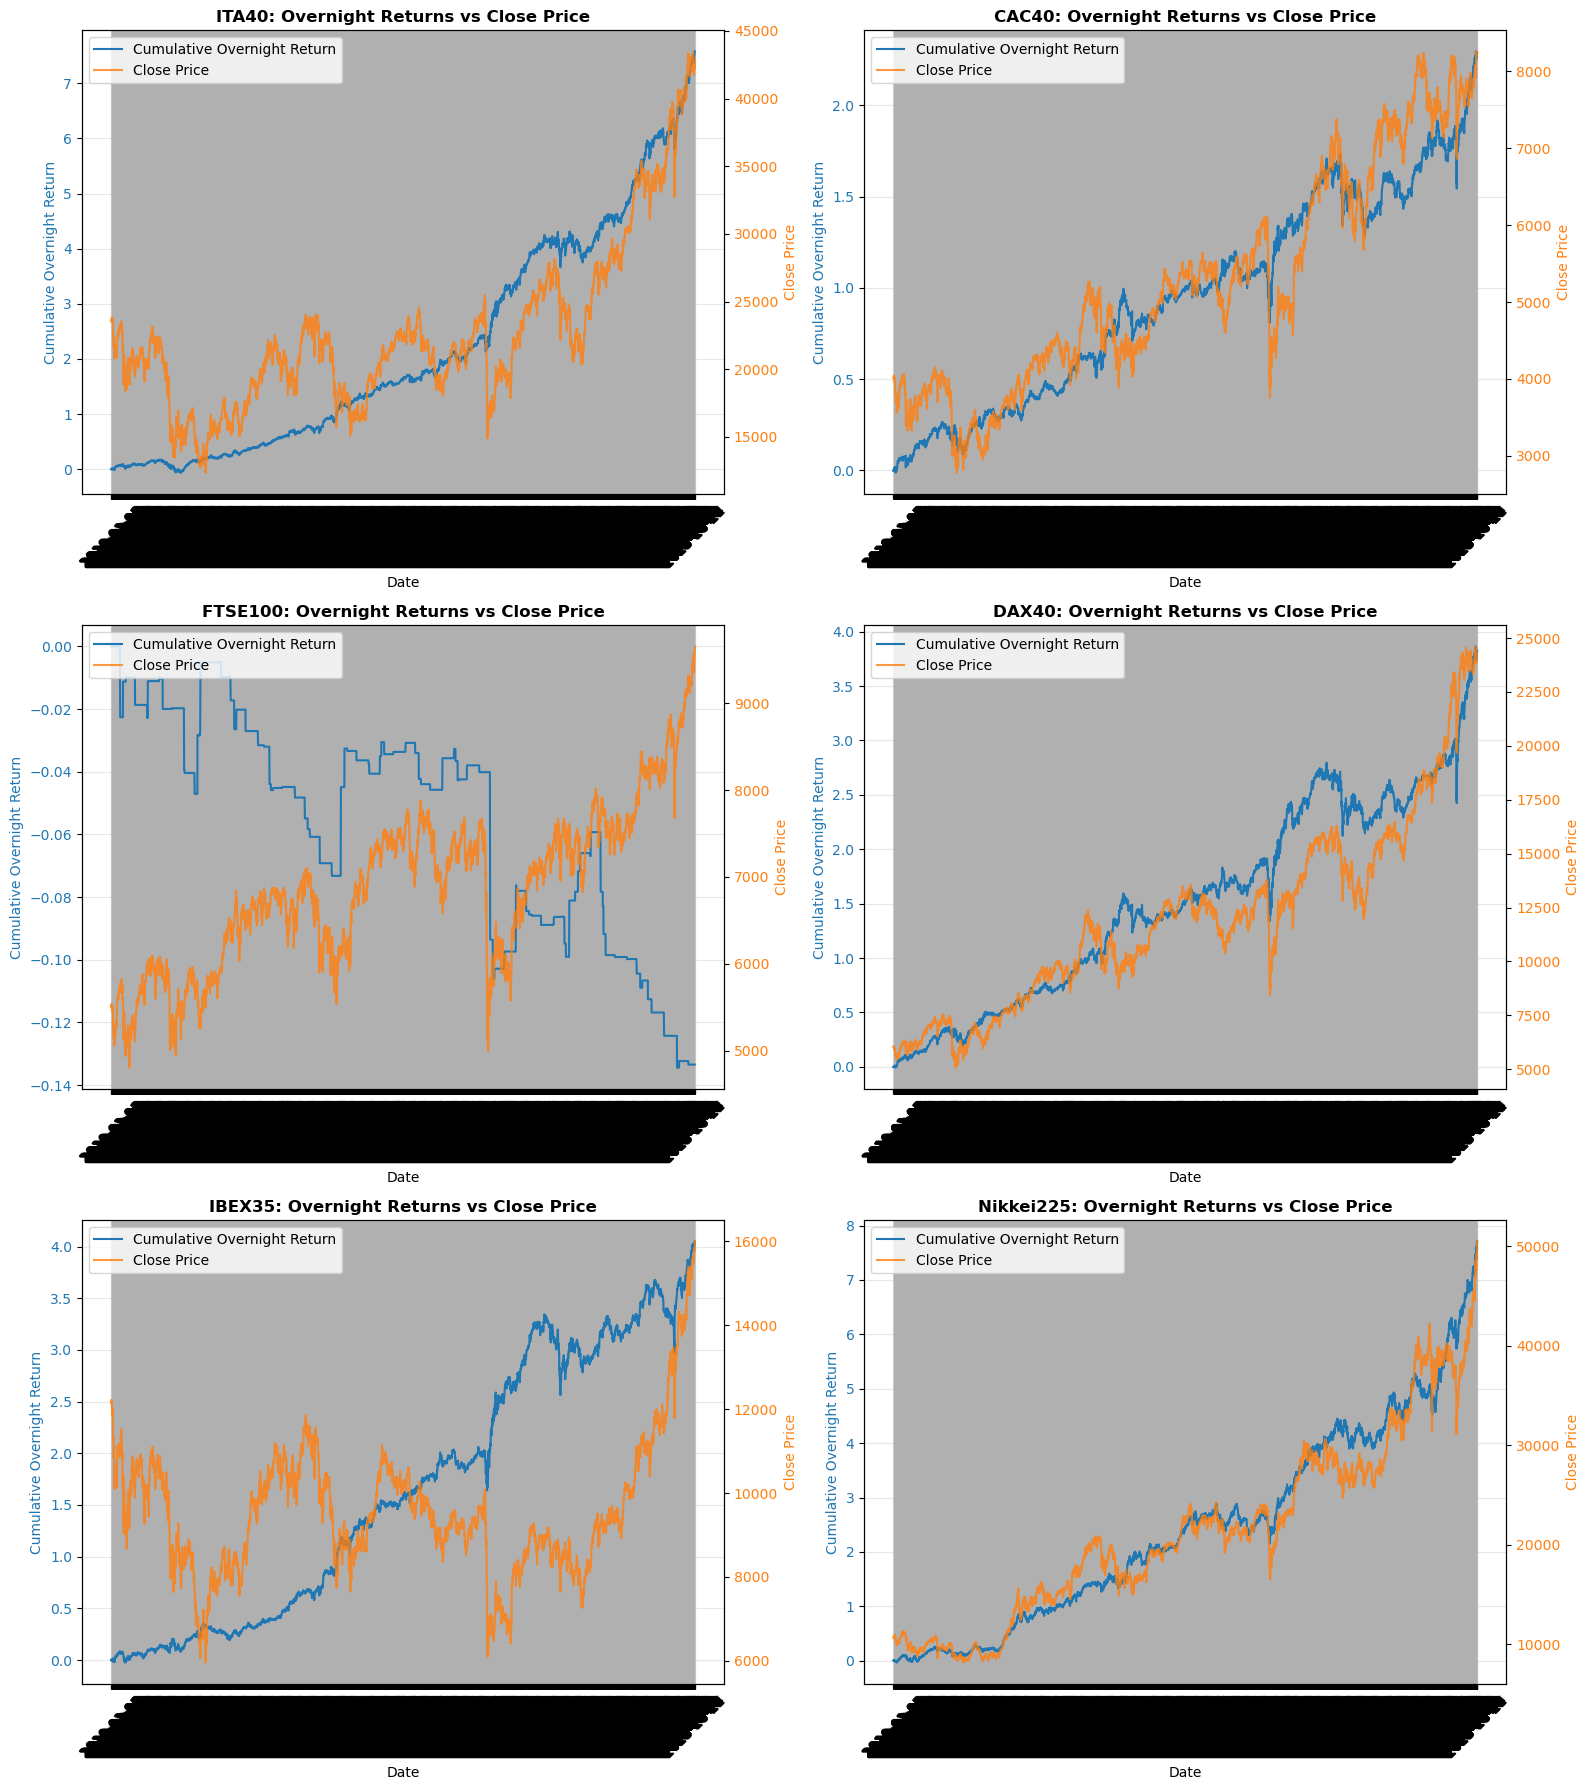

In [30]:
import matplotlib.pyplot as plt

def plot_overnight_returns_vs_close(df, tickers):
    """
    Plot cumulative overnight returns vs close prices for each ticker.
    Creates separate charts with dual y-axes for each ticker.
    
    Parameters:
    df: DataFrame with MultiIndex columns containing overnight_cumulative_return and Close
    tickers: List of ticker symbols to plot
    """
    
    # Set up the subplot layout
    n_tickers = len(tickers)
    cols = 2  # 2 columns
    rows = (n_tickers + cols - 1) // cols  # Calculate required rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(16, 6 * rows))
    
    # Handle single row case
    if rows == 1:
        axes = axes.reshape(1, -1)
    # Handle single ticker case  
    if n_tickers == 1:
        axes = axes.reshape(1, 1)
    
    # Flatten axes for easy iteration
    axes_flat = axes.flatten()
    
    for i, ticker in enumerate(tickers):
        ax1 = axes_flat[i]
        
        try:
            # Check if required columns exist
            if (ticker, 'overnight_cumulative_return') not in df.columns:
                print(f"Warning: overnight_cumulative_return not found for {ticker}")
                continue
                
            if (ticker, 'Close') not in df.columns:
                print(f"Warning: Close price not found for {ticker}")
                continue
            
            # Get the data
            cumulative_returns = df[(ticker, 'overnight_cumulative_return')].dropna()
            close_prices = df[(ticker, 'Close')].dropna()
            
            # Plot cumulative returns on left y-axis
            color1 = 'tab:blue'
            ax1.set_xlabel('Date')
            ax1.set_ylabel('Cumulative Overnight Return', color=color1)
            line1 = ax1.plot(cumulative_returns.index, cumulative_returns, 
                           color=color1, label='Cumulative Overnight Return', linewidth=1.5)
            ax1.tick_params(axis='y', labelcolor=color1)
            ax1.grid(True, alpha=0.3)
            
            # Create second y-axis for close prices
            ax2 = ax1.twinx()
            color2 = 'tab:orange'
            ax2.set_ylabel('Close Price', color=color2)
            line2 = ax2.plot(close_prices.index, close_prices, 
                           color=color2, label='Close Price', linewidth=1.5, alpha=0.8)
            ax2.tick_params(axis='y', labelcolor=color2)
            
            # Set title
            ax1.set_title(f'{ticker}: Overnight Returns vs Close Price', fontsize=12, fontweight='bold')
            
            # Add legend
            lines = line1 + line2
            labels = [l.get_label() for l in lines]
            ax1.legend(lines, labels, loc='upper left')
            
            # Rotate x-axis labels for better readability
            ax1.tick_params(axis='x', rotation=45)
            
        except Exception as e:
            print(f"Error plotting {ticker}: {e}")
            ax1.set_title(f'{ticker}: Error in plotting')
            ax1.text(0.5, 0.5, f'Error: {str(e)}', transform=ax1.transAxes, 
                    ha='center', va='center')
    
    # Hide empty subplots
    for j in range(i + 1, len(axes_flat)):
        axes_flat[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_overnight_returns_vs_close(df_with_overnight, level_0_tickers)

In [ ]:
# # add rolling statistics of cumulative overnight returns
# df['rolling_mean_30'] = df['cumulative_overnight_return'].rolling(window=30).mean()
# df['rolling_std_30'] = df['cumulative_overnight_return'].rolling(window=30).std()
# df['rolling_mean_90'] = df['cumulative_overnight_return'].rolling(window=90).mean()
# df['rolling_std_90'] = df['cumulative_overnight_return'].rolling(window=90).std()
# df['rolling_mean_180'] = df['cumulative_overnight_return'].rolling(window=180).mean()
# df['rolling_std_180'] = df['cumulative_overnight_return'].rolling(window=180).std()
# df['rolling_mean_365'] = df['cumulative_overnight_return'].rolling(window=365).mean()
# df['rolling_std_365'] = df['cumulative_overnight_return'].rolling(window=365).std()
# df['rolling_mean_3y'] = df['cumulative_overnight_return'].rolling(window=365*3).mean()
# df['rolling_std_3y'] = df['cumulative_overnight_return'].rolling(window=365*3).std()
# df['rolling_mean_5y'] = df['cumulative_overnight_return'].rolling(window=365*5).mean()
# df['rolling_std_5y'] = df['cumulative_overnight_return'].rolling(window=365*5).std()
# df['rolling_mean_10y'] = df['cumulative_overnight_return'].rolling(window=365*10).mean()
# df['rolling_std_10y'] = df['cumulative_overnight_return'].rolling(window=365*10).std()
# df['rolling_mean_20y'] = df['cumulative_overnight_return'].rolling(window=365*20).mean()
# df['rolling_std_20y'] = df['cumulative_overnight_return'].rolling(window=365*20).std()
# df.head()

,open,high,low,close,volume,next_day_open,overnight_return,cumulative_overnight_return,rolling_mean_30,rolling_std_30,...,rolling_mean_365,rolling_std_365,rolling_mean_3y,rolling_std_3y,rolling_mean_5y,rolling_std_5y,rolling_mean_10y,rolling_std_10y,rolling_mean_20y,rolling_std_20y
date,,,,,,,,,,,,,,,,,,,,,
1957-01-02,46.20,46.20,46.20,46.20,1088889.0,46.60,0.008658,0.008658,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-01-03,46.60,46.60,46.60,46.60,1255556.0,46.66,0.001288,0.009957,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-01-04,46.66,46.66,46.66,46.66,1505556.0,46.42,-0.005144,0.004762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-01-07,46.42,46.42,46.42,46.42,1388889.0,46.25,-0.003662,0.001082,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-01-08,46.25,46.25,46.25,46.25,1238889.0,46.16,-0.001946,-0.000866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
